# 1. Intro Data Scalling 

Khi xử lí dữ liệu thô, gặp nhiều các dữ liệu ạ => khó để phân tích. Các tiếp cận là biến đổi dữ liệu, và đưa về một phân phối chuẩn.

Scaling là biến đổi khoảng giá trị của dữ liệu về 1 khoảng thường là 0-1.

Có 2 cách để scale dữ liệu là normalization và standardization  (Bình thường hóa dữ liệu và chuẩn hóa dữ liệu)

# 2. Normalization

Là 1 phương pháp scale dữ liệu từ miền giá trị bất kì sang miền giá trị nằm trong khoảng 0 đến 1. Yêu cầu xác định giá trị max và giá trị min

$$ y = \frac{x-min}{max-min} $$

Công thức trên áp dụng với từng feature.

Các bước thực hiện normalize sử dụng thư viện scikit-learn với MinMaxScaler
- Fit biến Scaler sử đụng tập dữ liệu huấn luyện. Để normalize thì dữ liệu huấn luyện cần phải xác định được max và min. Để thử hiện thì dùng hàm fit()
- Tiến hành scale dữ liệu bằng hàm transform()
- Áp dụng lại bộ scaler để sử dụng cho việc dự đoán.

=> Dùng cho các dữ liệu không có phân phối Gaussian. Sử dùng khi dữ liệu có phạm vi đa dạng, dùng cho các dữ liệu không đưa ra giả định về phân phối  


# 3. Standardization

là việc scale dữ liệu về một phân bố trong đó giá trị trung bình của quan sát bằng 0 và độ lệch chuẩn = 1. Công thức chuẩn hóa:
$$ y = \frac{x - \text{mean}}{\text{standard_deviation}}$$

với $$\text{mean} = \frac{\text{sum}(x)}{\text{count}(x)}$$
Độ lệch chuẩn
$$\text{standard_deviation} = \sqrt{\frac{\text{sum}\big{(} (x-mean)^2\big{)}}{\text{count}(x)}}$$

=> Ưu tiên tính đa biến, áp dụng khi dữ liệu có phân phối Gaussian, Hữu ích khi dữ liệu có các tỷ lệ khác nhau và các thuật toán được sử dụng, đưa ra các giả định về phân phối dữ liệu như hồi quy logistic

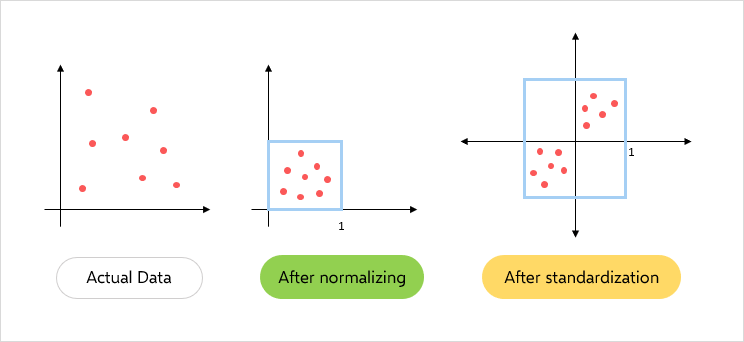

# 4. Feature Encoding
Machine learning models can only work with numberical values => It is necessary to transform the categorical values of the revant features into numerical ones => called feature encoding.
- one-hot encoding: Assigns vectors to each category. The vector represent whether the corresponding feature is present (1) or not (0).
- target-mean encoding: Replaces categorical values with the mean of the target variable.
- frequency encoding: Takes into account how many times a given categorical value is present in relation with a feature.


# 5. Example
## 5.1 Preprocessing data

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [152]:
dataset = pd.read_csv('train_titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
def Preprocessing_data(dataset):
    
    #fill Age
    dataset['Age'].fillna(value=dataset['Age'].mean(), inplace=True)
    
    
    dataset['Fare'].fillna(value=dataset['Fare'].mean(), inplace=True)
    dataset['Embarked'].fillna('Q', inplace=True)
    

    
    dataset = dataset.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
    return dataset
    
dataset = Preprocessing_data(dataset)

In [154]:
def One_hot_columns(dataset):
    
    cat_cols = ['Sex','Embarked']
    cat_cols_encoded = []
    for col in cat_cols:
        cat_cols_encoded += sorted([cat for cat in list(dataset[col].unique())])
        
    
    oh_encoder = OneHotEncoder(sparse = False,handle_unknown='ignore')
    encoder_cols = oh_encoder.fit_transform(dataset[cat_cols])
    df_new = pd.DataFrame(encoder_cols,columns = cat_cols_encoded)
    datasetnew = dataset.join(df_new)
    
    datasetnew = datasetnew.drop(cat_cols,axis=1)
    
    return datasetnew

datasetnew = One_hot_columns(dataset)

In [155]:
datasetnew.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


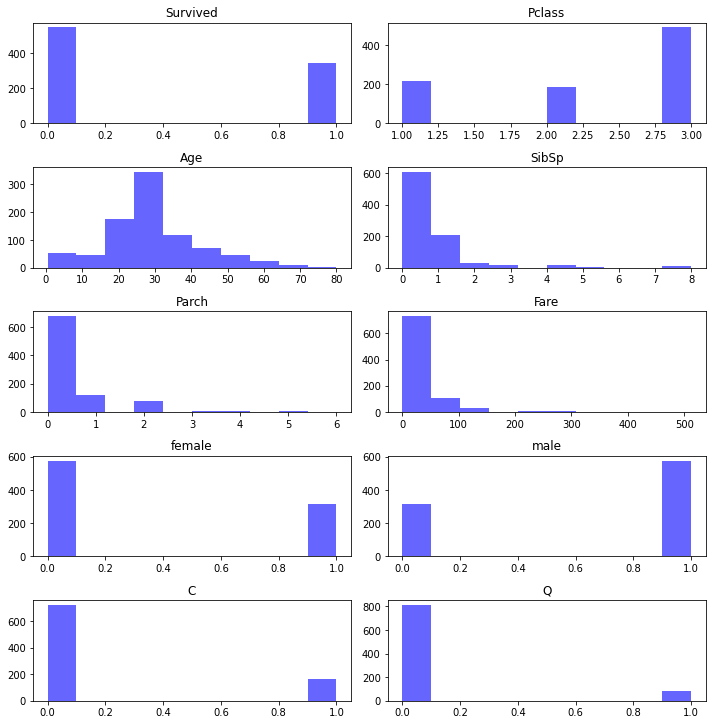

In [156]:
num_list = list(datasetnew.columns)
fig = plt.figure(figsize=(10,30))
                 
for i in range(len(num_list)-1):
    plt.subplot(15, 2, i+1)
    plt.title(num_list[i])
    plt.hist(datasetnew[num_list[i]], color='b', alpha=0.6)
plt.tight_layout()
plt.show()


## 5.2 Test model  
test model when don't use standardization and sormalization

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [158]:
datasetnew.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [159]:
y = datasetnew.iloc[:,0].values
X = datasetnew.iloc[:,1:].values
print(X[:3])
print(y[:3])

[[ 3.     22.      1.      0.      7.25    0.      1.      0.      0.
   1.    ]
 [ 1.     38.      1.      0.     71.2833  1.      0.      1.      0.
   0.    ]
 [ 3.     26.      0.      0.      7.925   1.      0.      0.      0.
   1.    ]]
[0 1 1]


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=45)

In [161]:
def Test_model(X_train,X_test,y_train,y_test,scalling):
    classifications = [['DecisionTreeClassifier',DecisionTreeClassifier()],
                      ['KNeighborsClassifier',KNeighborsClassifier()],
                      ['MLPClassifier',MLPClassifier(max_iter=500)]]
    Acc = pd.DataFrame(index=None,columns=['Model','Accuracy','Scalling'])
    for mod in classifications :
        name = mod[0]
        model = mod[1]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        Acc = Acc.append(pd.Series({'Model':name,
                                    'Accuracy':accuracy_score(y_test,y_pred),
                                    'Scalling':scalling}),ignore_index=True)
    #print(Acc.sort_values(by='Accuracy',ascending=False))
    return Acc

In [162]:
df1 = Test_model(X_train,X_test,y_train,y_test,'No Scalling')
df1

,Model,Accuracy,Scalling
0,DecisionTreeClassifier,0.754190,No Scalling
1,KNeighborsClassifier,0.703911,No Scalling
2,MLPClassifier,0.804469,No Scalling


# 5.3 Test model with Normalization

In [163]:
data_nor = datasetnew.copy()
data_nor.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [164]:
MNScaler = MinMaxScaler()
data_nor[['Age','Fare']] = MNScaler.fit_transform(data_nor[['Age','Fare']])
data_nor.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,0.271174,1,0,0.014151,0.0,1.0,0.0,0.0,1.0
1,1,1,0.472229,1,0,0.139136,1.0,0.0,1.0,0.0,0.0
2,1,3,0.321438,0,0,0.015469,1.0,0.0,0.0,0.0,1.0
3,1,1,0.434531,1,0,0.103644,1.0,0.0,0.0,0.0,1.0
4,0,3,0.434531,0,0,0.015713,0.0,1.0,0.0,0.0,1.0


In [165]:
X_nor = data_nor.iloc[:,1:].values
y_nor = data_nor.iloc[:,0].values
print(X_nor[:5])
print(y_nor[:5])

[[3.         0.27117366 1.         0.         0.01415106 0.
  1.         0.         0.         1.        ]
 [1.         0.4722292  1.         0.         0.13913574 1.
  0.         1.         0.         0.        ]
 [3.         0.32143755 0.         0.         0.01546857 1.
  0.         0.         0.         1.        ]
 [1.         0.43453129 1.         0.         0.1036443  1.
  0.         0.         0.         1.        ]
 [3.         0.43453129 0.         0.         0.01571255 0.
  1.         0.         0.         1.        ]]
[0 1 1 1 0]


In [166]:
X_nor_train, X_nor_test, y_nor_train, y_nor_test = train_test_split(X_nor, y_nor, test_size=0.2, random_state=45)

In [167]:
df2 = Test_model(X_nor_train, X_nor_test, y_nor_train, y_nor_test,'Normalization')
df2

,Model,Accuracy,Scalling
0,DecisionTreeClassifier,0.754190,Normalization
1,KNeighborsClassifier,0.843575,Normalization
2,MLPClassifier,0.854749,Normalization


# 5.4 Test model with Standardization

In [168]:
data_stand = datasetnew.copy()
data_stand.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [169]:
standardScaler = StandardScaler()
data_stand[['Age','Fare']]= standardScaler.fit_transform(data_stand[['Age','Fare']])
data_stand.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,-0.592481,1,0,-0.502445,0.0,1.0,0.0,0.0,1.0
1,1,1,0.638789,1,0,0.786845,1.0,0.0,1.0,0.0,0.0
2,1,3,-0.284663,0,0,-0.488854,1.0,0.0,0.0,0.0,1.0
3,1,1,0.407926,1,0,0.420730,1.0,0.0,0.0,0.0,1.0
4,0,3,0.407926,0,0,-0.486337,0.0,1.0,0.0,0.0,1.0


In [170]:
X_stand = data_stand.iloc[:,1:].values
y_stand = data_stand.iloc[:,0].values
print(X_stand[:3])
print(y_stand[:3])

[[ 3.         -0.5924806   1.          0.         -0.50244517  0.
   1.          0.          0.          1.        ]
 [ 1.          0.63878901  1.          0.          0.78684529  1.
   0.          1.          0.          0.        ]
 [ 3.         -0.2846632   0.          0.         -0.48885426  1.
   0.          0.          0.          1.        ]]
[0 1 1]


In [171]:
X_stand_train, X_stand_test, y_stand_train, y_stand_test = train_test_split(X_stand, y_stand, test_size = 0.2, random_state=45)

In [172]:
df3= Test_model(X_stand_train, X_stand_test, y_stand_train, y_stand_test,'Standardization')
df3

c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,Model,Accuracy,Scalling
0,DecisionTreeClassifier,0.759777,Standardization
1,KNeighborsClassifier,0.837989,Standardization
2,MLPClassifier,0.826816,Standardization


In [173]:
df_ac = pd.concat([df1,df3,df2])
print(df_ac)

                    Model  Accuracy         Scalling
0  DecisionTreeClassifier  0.754190      No Scalling
1    KNeighborsClassifier  0.703911      No Scalling
2           MLPClassifier  0.804469      No Scalling
0  DecisionTreeClassifier  0.759777  Standardization
1    KNeighborsClassifier  0.837989  Standardization
2           MLPClassifier  0.826816  Standardization
0  DecisionTreeClassifier  0.754190    Normalization
1    KNeighborsClassifier  0.843575    Normalization
2           MLPClassifier  0.854749    Normalization


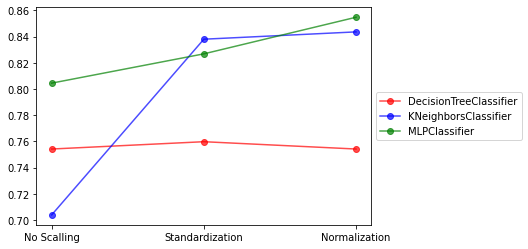

In [174]:
cdict = {'DecisionTreeClassifier':'red', 'KNeighborsClassifier':'blue', 'MLPClassifier': 'green'}
fig, ax =  plt.subplots()


for model in cdict.keys():
    df=df_ac[df_ac['Model']==model]
    plt.plot(df['Scalling'],df['Accuracy'],c=cdict[model],label=model, marker='o', alpha = 0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()